In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Load Titanic dataset
df = pd.read_csv(r"C:\Users\rimjh\Downloads\train.csv.zip") # Update the path to your local file

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Step 3: Explore the dataset
print("Shape of data:", df.shape)
print("\nDataset info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())

Shape of data: (891, 12)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            

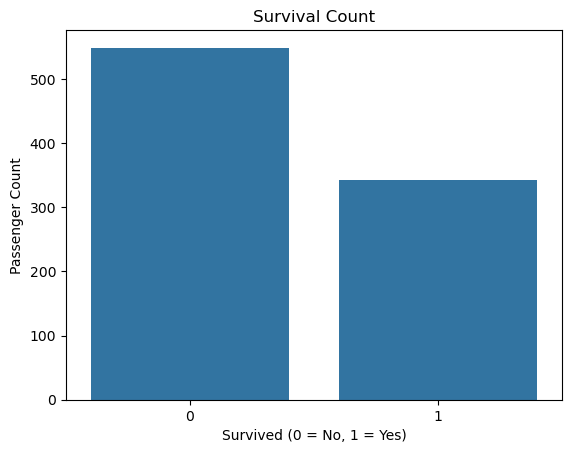

In [4]:
# Step 4: Visualize Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

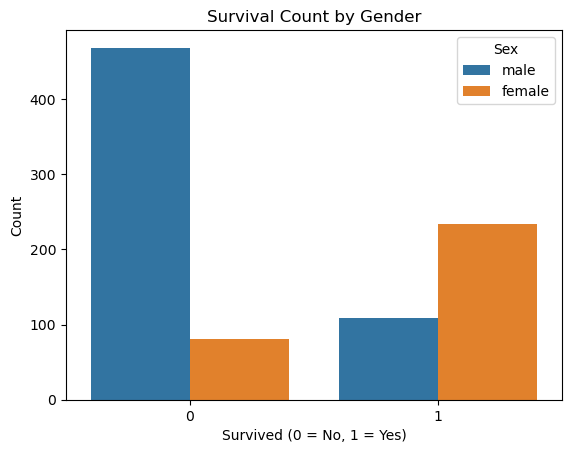

In [5]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

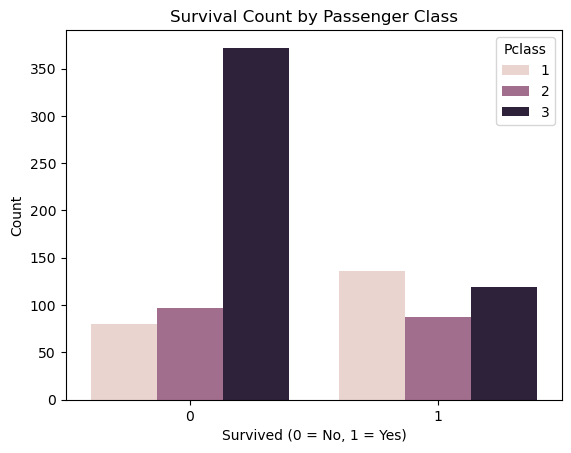

In [6]:
# Survival by Passenger Class
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

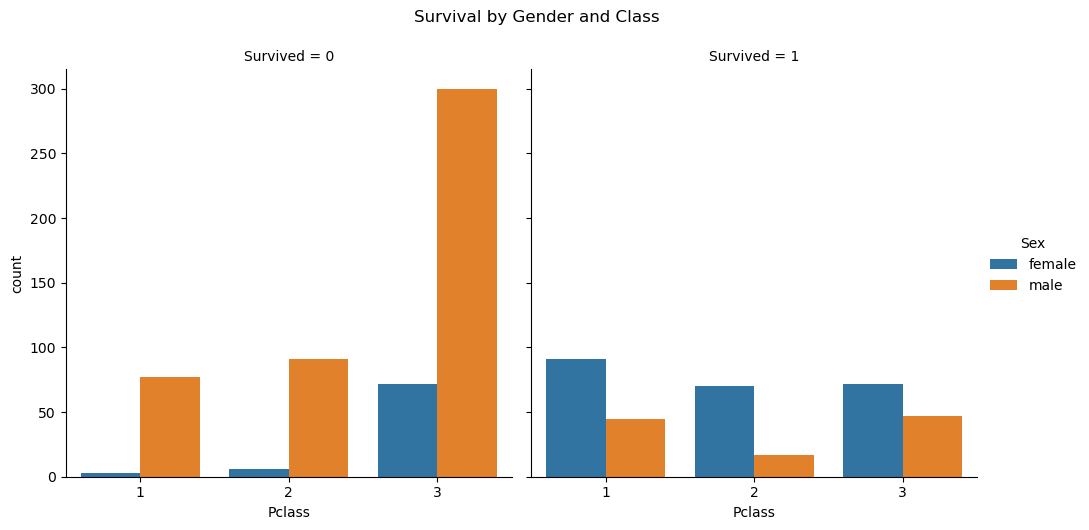

In [7]:
# Survival by Gender and Class
sns.catplot(data=df, x='Pclass', hue='Sex', col='Survived', kind='count')
plt.suptitle('Survival by Gender and Class', y=1.05)
plt.show()

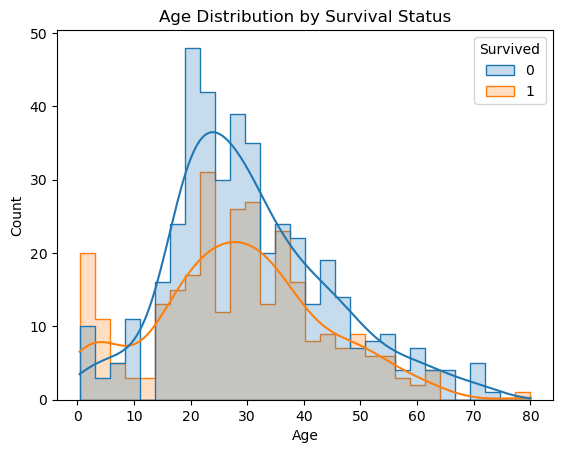

In [8]:
# Age distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element="step")
plt.title('Age Distribution by Survival Status')
plt.show()

In [9]:
# Step 5: Preprocessing for Model
# Encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill missing 'Age' with median
df['Age']=df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

In [10]:
# Step 6: Model Training
# Select features
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.7932960893854749


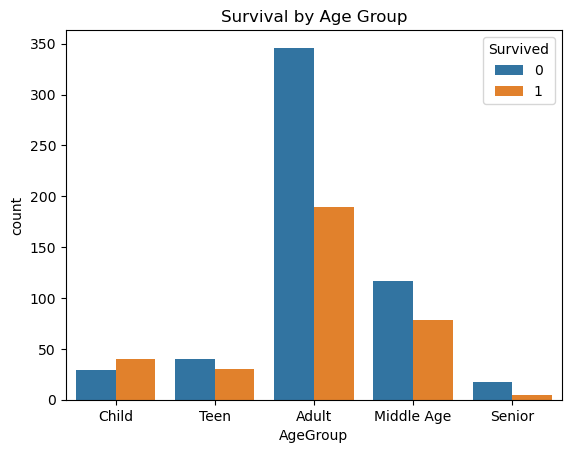

In [11]:
# Step 7: Visualization - Age Groups
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival by Age Group')
plt.show()

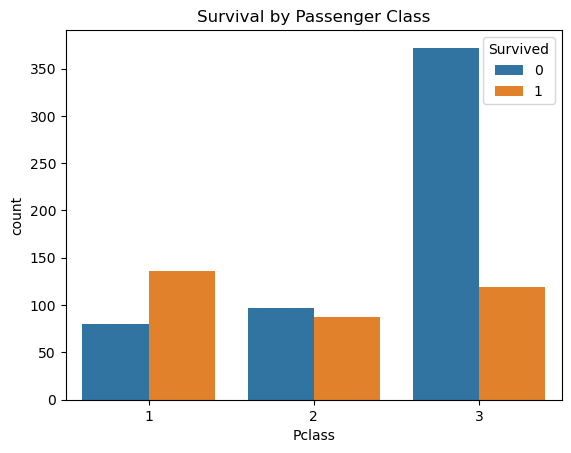

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [16]:
# Assuming 'df' is your DataFrame
print(df.dtypes)  # Check data types

# Convert non-numeric columns to numeric if necessary
# For example, let's say 'column_name' is a categorical column
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')  # or use encoding techniques

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
AgeGroup       category
dtype: object


In [17]:
# Drop non-numeric columns if necessary
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Calculate correlation and create heatmap

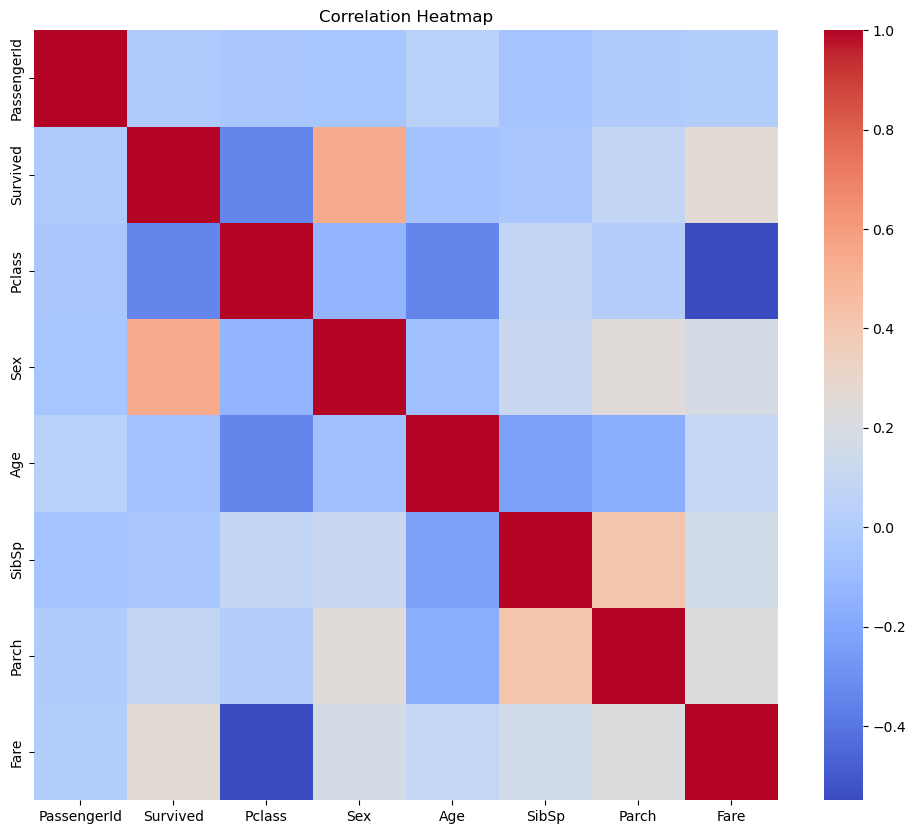

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", pd.Series(y_res).value_counts())

After SMOTE: Survived
0    444
1    444
Name: count, dtype: int64


In [20]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')


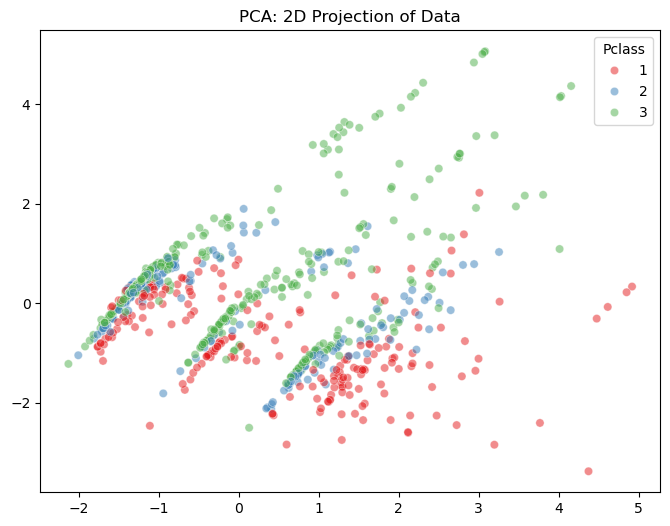

In [21]:
X = df.drop('Pclass', axis=1)
# Ensure X contains only numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X = X[numerical_cols]
y = df['Pclass']
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", alpha=0.5)
plt.title("PCA: 2D Projection of Data")
plt.show()

C:\Users\rimjh\.anaconda\rimjhimkumari\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


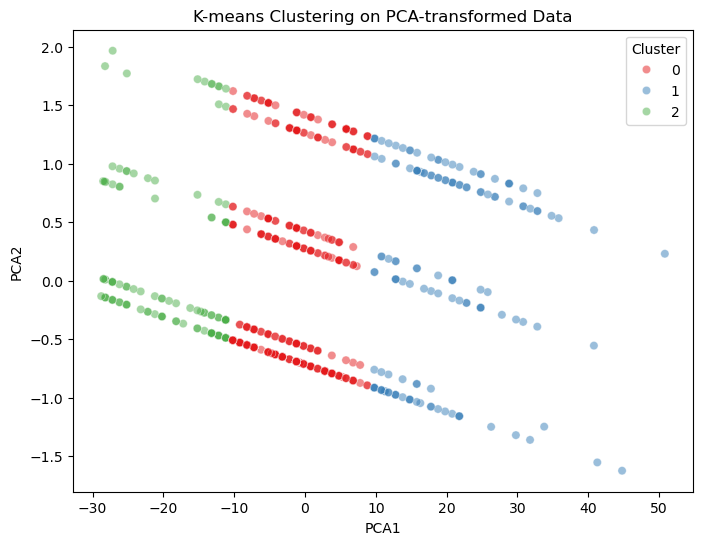

In [22]:
X_pca = PCA(n_components=2).fit_transform(X_train)
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
kmeans = KMeans(n_clusters=3, random_state=42)
X_pca_df['Cluster'] = kmeans.fit_predict(X_pca_df[['PCA1', 'PCA2']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=X_pca_df, palette='Set1', alpha=0.5)
plt.title('K-means Clustering on PCA-transformed Data')
plt.show()

In [23]:
# Assuming X_pca is your data after PCA transformation
cluster = KMeans(n_clusters=2).fit_predict(X_pca)

print(X_pca.shape)
print(cluster.shape)

(712, 2)
(712,)


C:\Users\rimjh\.anaconda\rimjhimkumari\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



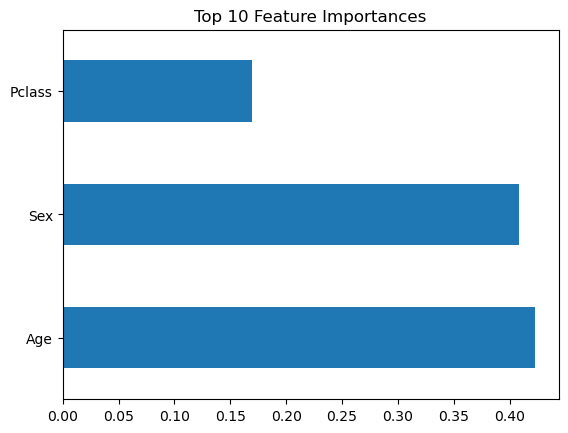

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

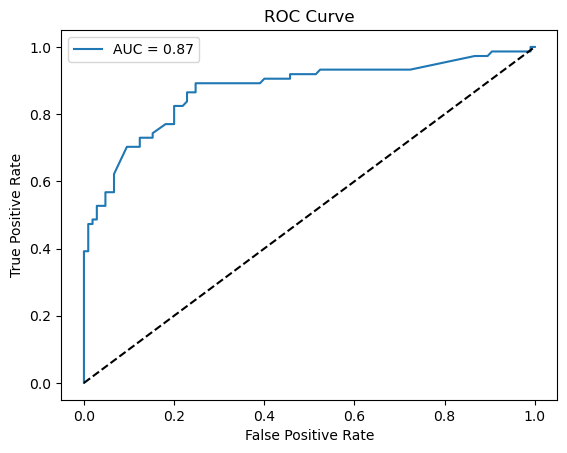

In [26]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

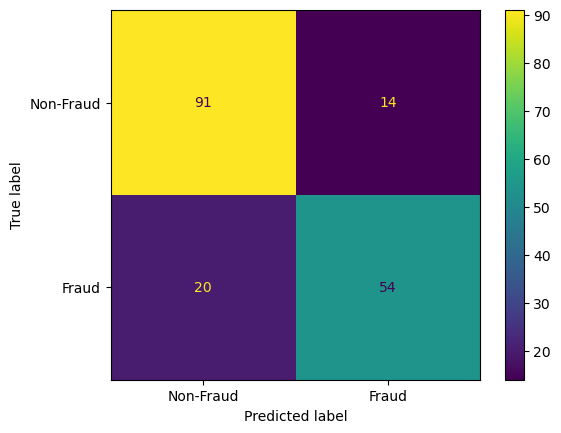

In [27]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Non-Fraud', 'Fraud']).plot()
plt.show()

In [28]:
fraud_percentage = df['Pclass'].value_counts(normalize=True)[1] * 100
print(f"Fraudulent transactions: {fraud_percentage:.2f}%")

Fraudulent transactions: 24.24%
